In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
from PIL import Image
import os, sys

In [3]:
path = "C:\\Users\\nafissaad\\Tutorial\\Deep Learning\\Codebasics\\Handling imbalanced datasets in machine learning 21\\Subject\\Eng\\"
dirs = os.listdir(path)
for item in dirs:
    if os.path.isfile(path+item):
        im=Image.open(path+item).convert('RGB')#Converting all the images to jpg
        f, e = os.path.splitext(path+item)
        imResize = im.resize((256,256), Image.ANTIALIAS)#Reshape
        print(imResize.mode)
        imResize.save(f+'.jpg','JPEG',quality = 95)

RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB


In [4]:
IMAGE_SIZE=255
BATCH_SIZE=1

In [5]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\nafissaad\\Tutorial\\Deep Learning\\Codebasics\\Handling imbalanced datasets in machine learning 21\\Subject\\",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 38 files belonging to 2 classes.


In [6]:
class_names=dataset.class_names
class_names

['Eng', 'Math']

In [7]:
len(dataset)

38

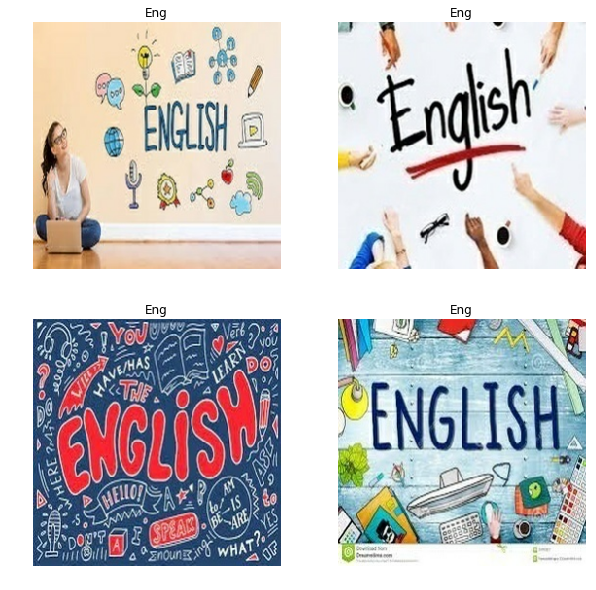

In [8]:
plt.figure(figsize=(10,10))
for i in range(4):
    for image_batch, label_batch in dataset.take(1):
        #print(image_batch.shape)
        #print(label_batch.numpy())
        #print(image_batch[0])
        #print(image_batch[0].numpy())
        ax=plt.subplot(2,2,i+1)
        plt.imshow(image_batch[0].numpy().astype('int64'))#it is float so we converted it to int by astype unint
        plt.title(class_names[label_batch[0]])
        plt.axis('off')

In [9]:
#80%==>training
#20%==>10% validation,10% test

In [10]:
train_size=0.8
len(dataset)*train_size

30.400000000000002

In [11]:
train_ds=dataset.take(30)
len(train_ds)

30

In [12]:
test_ds=dataset.skip(30)
len(test_ds)

8

In [13]:
val_size=0.1
len(dataset)*val_size

3.8000000000000003

In [14]:
val_ds=test_ds.take(3)
len(val_ds)

3

In [15]:
test_ds=test_ds.skip(3)

In [16]:
def get_dataset_partitions_tf(df,train_split=0.8,val_split=0.1,shuffle=True,Shuffle_size=100):
    train_size=0.8
    if shuffle:
        df=df.shuffle(Shuffle_size,seed=12)#seed for predictibility
    train_ds=dataset.take(int(len(dataset)*train_size))
    test_ds=dataset.skip(int(len(dataset)*train_size))
    val_size=0.1
    val_ds=test_ds.take(int(len(dataset)*val_size))
    test_ds=test_ds.skip(int(len(dataset)*val_size))
    return train_ds,val_ds,test_ds

In [17]:
train_ds,val_ds,test_ds,=get_dataset_partitions_tf(dataset)
len(train_ds)

30

In [18]:
len(val_ds)

3

In [19]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
test_ds

<PrefetchDataset shapes: ((None, 255, 255, 3), (None,)), types: (tf.float32, tf.int32)>

In [21]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [22]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])